In [8]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [9]:
G = nx.erdos_renyi_graph(3000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=10, steps=2, selection_method='random')

In [10]:
# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 616
Number of deinfluenced nodes: 0
Number of susceptible nodes: 2384
influencer {961, 2794, 44, 2092, 2222, 1772, 1299, 1621, 1563, 2270}


In [11]:
# Run simulation for different values of k
budget_list = list(range(1,201,5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=2)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (6, {'Random': {2366}, 'High Degree': {840}, 'Low Degree': {214}}), (11, {'Random': {1398}, 'High Degree': {1}, 'Low Degree': {214, 1663}}), (16, {'Random': {723}, 'High Degree': {2}, 'Low Degree': {1975, 214, 1663}}), (21, {'Random': {1573, 1975}, 'High Degree': {6}, 'Low Degree': {1975, 773, 214, 1663}}), (26, {'Random': {549, 1975}, 'High Degree': {204}, 'Low Degree': {773, 1417, 214, 1975, 1663}}), (31, {'Random': {1234, 590}, 'High Degree': {2405}, 'Low Degree': {773, 1417, 214, 1975, 1533, 1663}}), (36, {'Random': {352, 2385, 2782, 1663}, 'High Degree': {2834}, 'Low Degree': {773, 1417, 2384, 214, 1975, 1533, 1663}}), (41, {'Random': {2593, 2698, 2179}, 'High Degree': {2834, 109}, 'Low Degree': {773, 2952, 1417, 2384, 214, 1975, 1533, 1663}}), (46, {'Random': {2534, 1146, 214, 702}, 'High Degree': {8, 2834}, 'Low Degree': {773, 2952, 1417, 840, 2384, 214, 1975, 1533, 1663}}), (51, {'Random': {2384, 781, 853, 1631

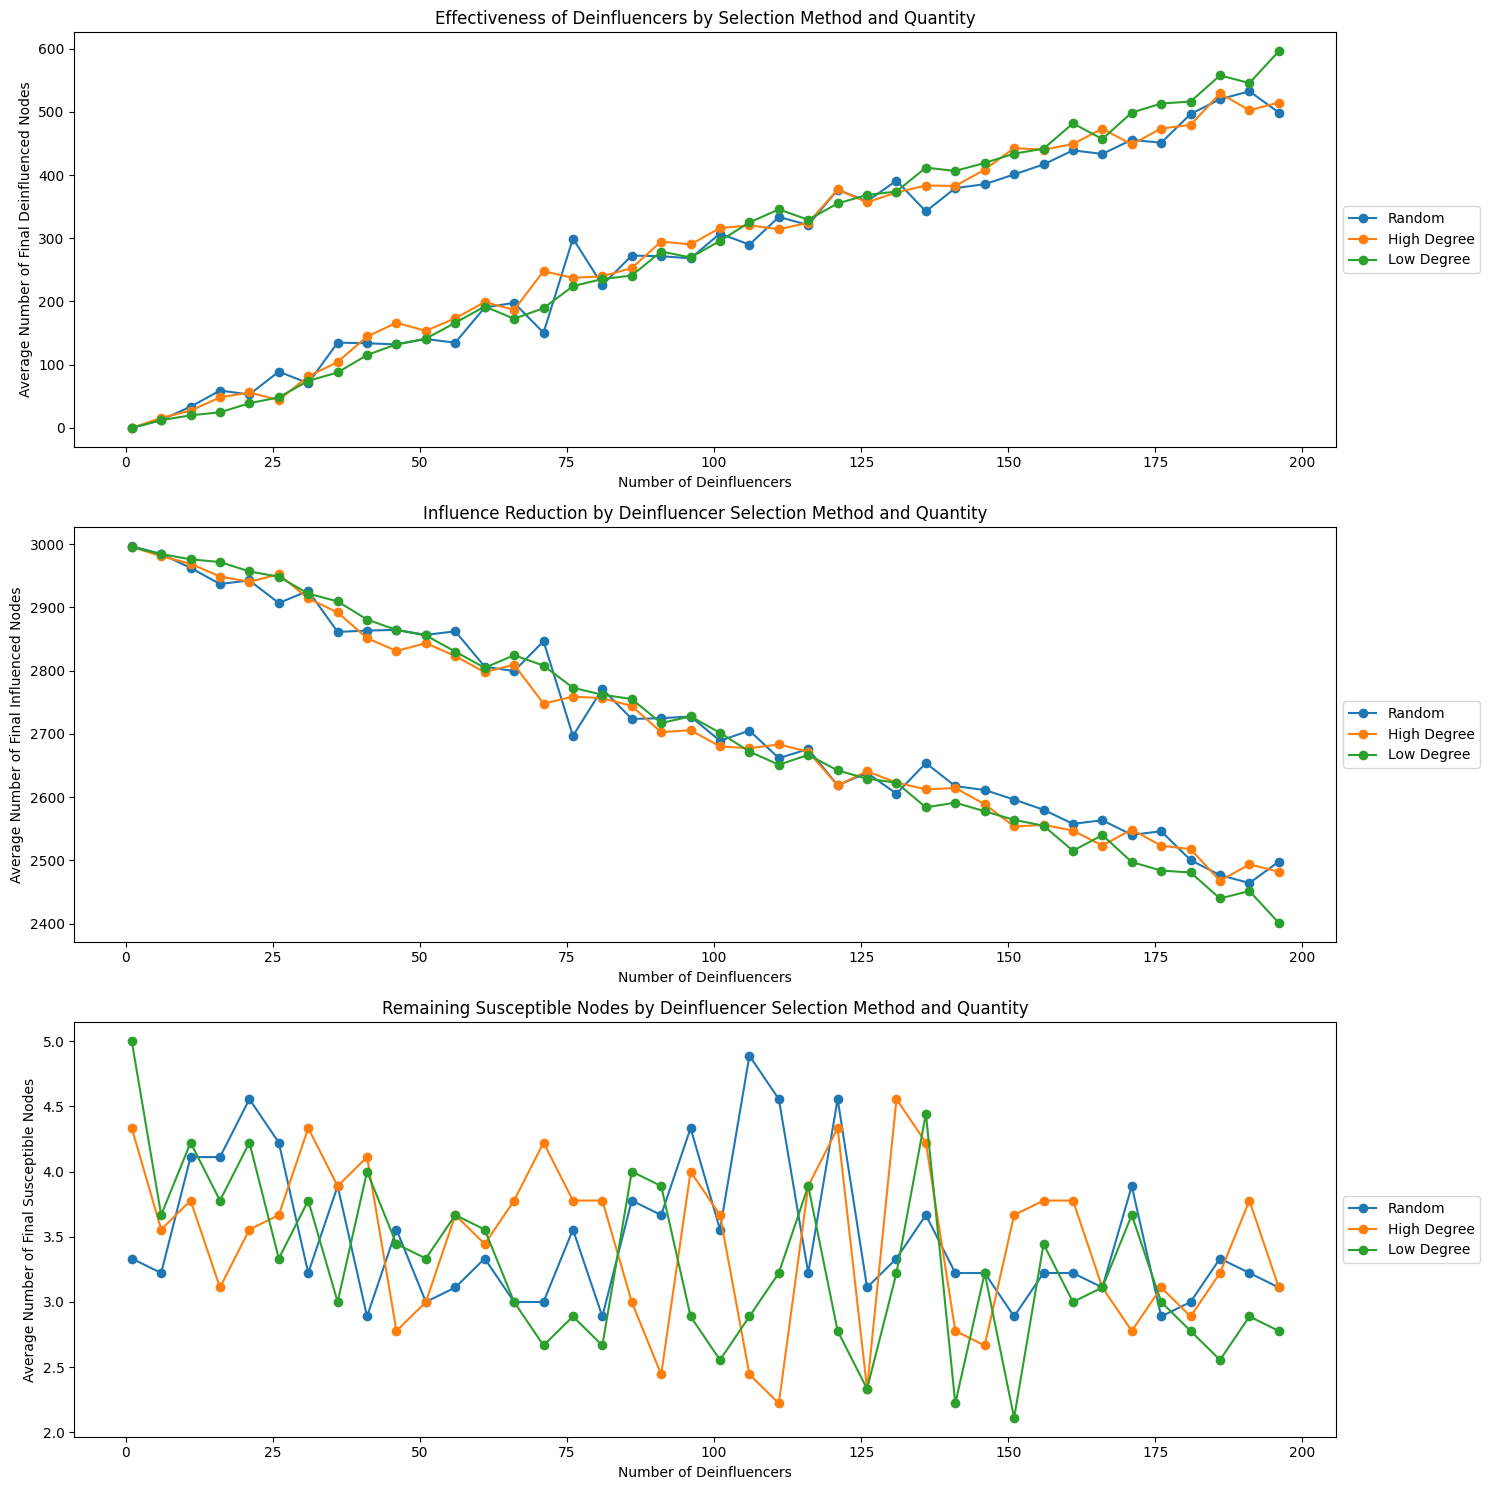

In [12]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
# Set titles for individual subplots
axs[0].set_title('Effectiveness of Deinfluencers by Selection Method and Quantity')
axs[1].set_title('Influence Reduction by Deinfluencer Selection Method and Quantity')
axs[2].set_title('Remaining Susceptible Nodes by Deinfluencer Selection Method and Quantity')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of Final Deinfluenced Nodes')

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Final Influenced Nodes')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Final Susceptible Nodes')


plt.tight_layout()
plt.show()

In [13]:
# Run simulation for different values of k
budget_list = list(range(1, 251,5))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=2)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (6, {'Random': set(), 'High Degree': set(), 'Low Degree': {214}}), (11, {'Random': {1448}, 'High Degree': set(), 'Low Degree': {214, 1663}}), (16, {'Random': {56}, 'High Degree': set(), 'Low Degree': {1975, 214, 1663}}), (21, {'Random': {486}, 'High Degree': set(), 'Low Degree': {1975, 773, 214, 1663}}), (26, {'Random': {1880}, 'High Degree': set(), 'Low Degree': {773, 1417, 214, 1975, 1663}}), (31, {'Random': {1064, 2843}, 'High Degree': set(), 'Low Degree': {773, 1417, 214, 1975, 1533, 1663}}), (36, {'Random': {322, 2605}, 'High Degree': {2834}, 'Low Degree': {773, 1417, 2384, 214, 1975, 1533, 1663}}), (41, {'Random': {161, 1531}, 'High Degree': {2834}, 'Low Degree': {773, 2952, 1417, 2384, 214, 1975, 1533, 1663}}), (46, {'Random': {1161, 2428}, 'High Degree': {2834}, 'Low Degree': {773, 2952, 1417, 840, 2384, 214, 1975, 1533, 1663}}), (51, {'Random': {2257, 2185, 2094}, 'High Degree': {2834}, 'Low Degree': {1092, 77

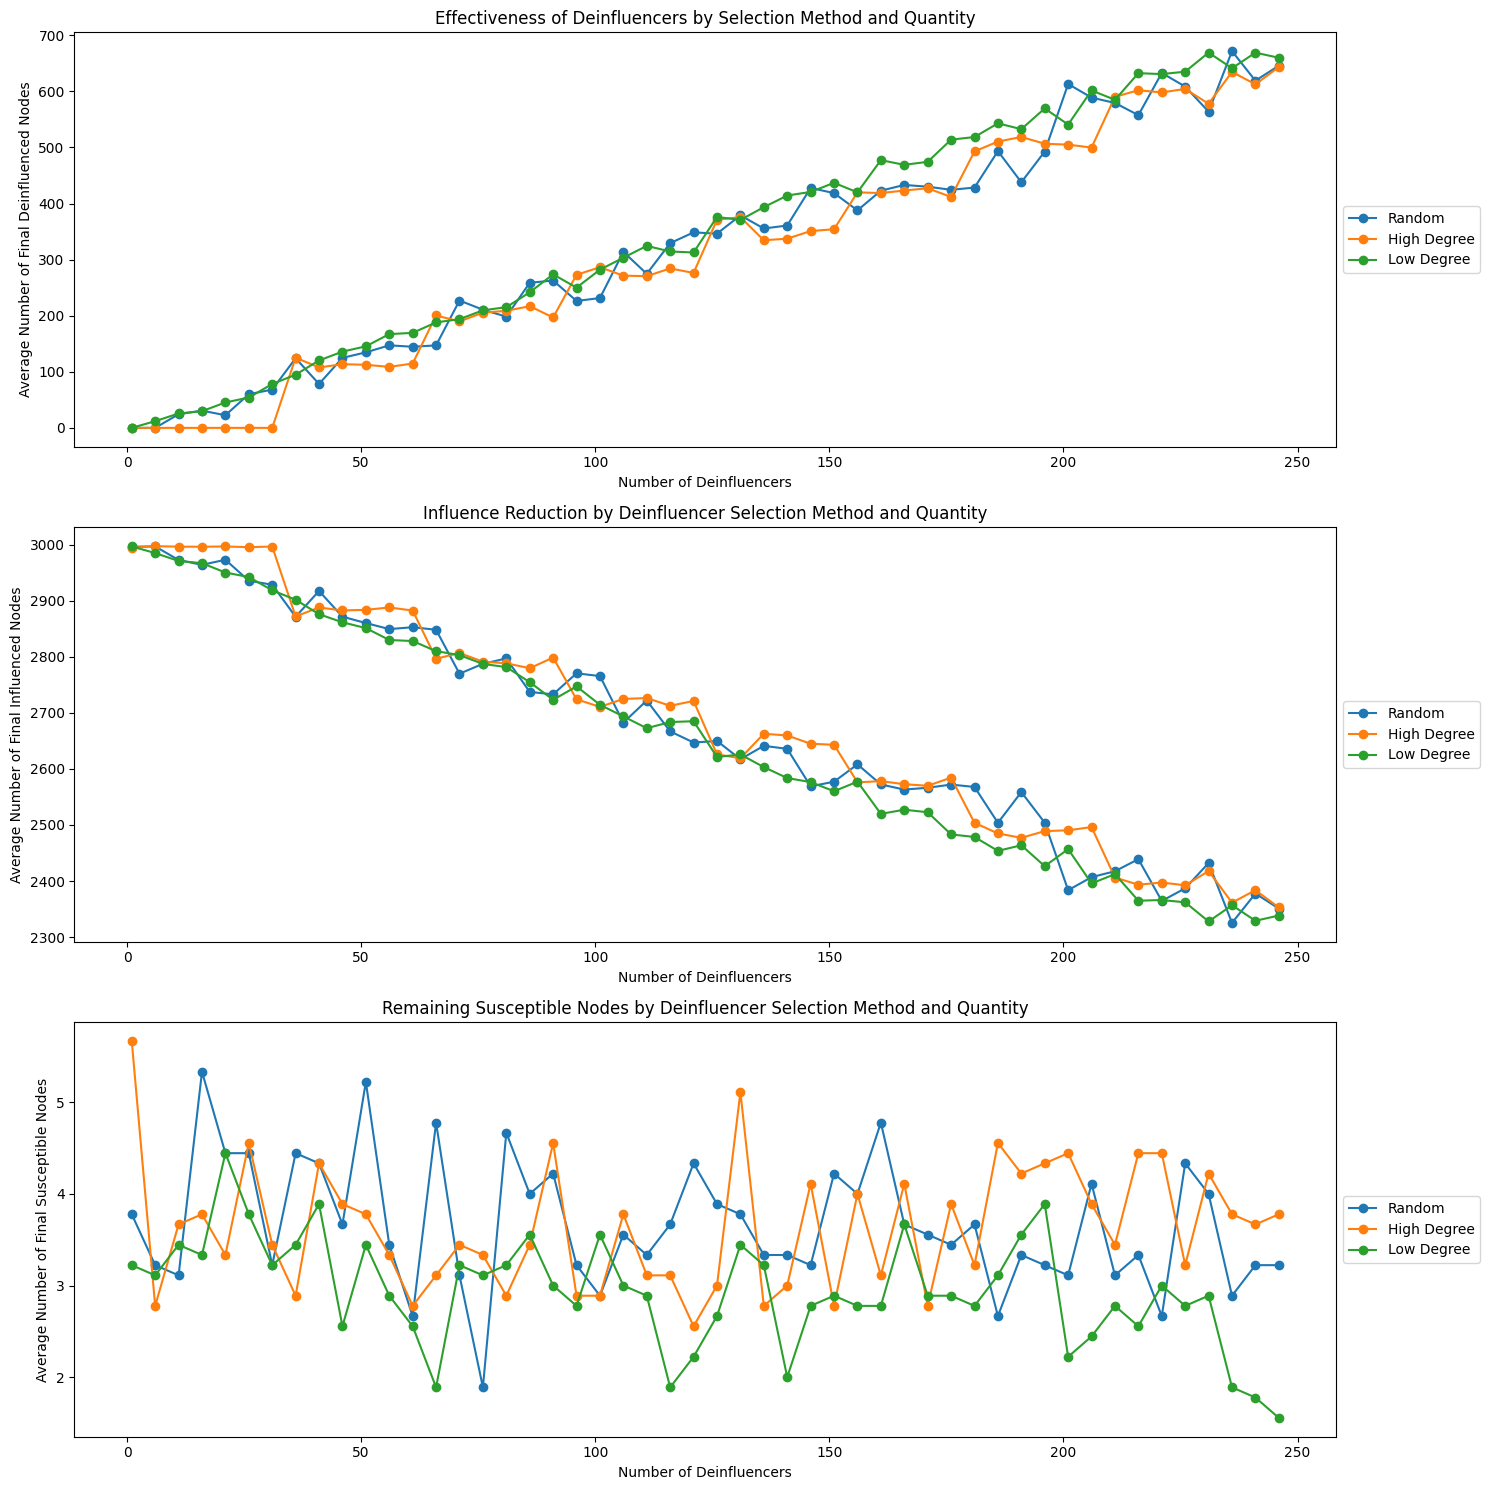

In [14]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
# Set titles for individual subplots
axs[0].set_title('Effectiveness of Deinfluencers by Selection Method and Quantity')
axs[1].set_title('Influence Reduction by Deinfluencer Selection Method and Quantity')
axs[2].set_title('Remaining Susceptible Nodes by Deinfluencer Selection Method and Quantity')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of Final Deinfluenced Nodes')

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Final Influenced Nodes')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Final Susceptible Nodes')


plt.tight_layout()
plt.show()